In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
# EXAMPLE KERNALS (STRUCTURING ELEMENTS)

se_original = np.asarray([[0,0,0],
                          [0,1,0],
                          [0,0,0]])

se_diamond3 = np.asarray([[0,1,0],
                          [1,1,1],
                          [0,1,0]])

se_diamond5 = np.asarray([[0,0,1,0,0],
                          [0,1,1,1,0],
                          [1,1,1,1,1],
                          [0,1,1,1,0],
                          [0,0,1,0,0]])

se_triangle3 = np.asarray([[0,0,1,0,0],
                           [0,1,1,1,0],
                           [1,1,1,1,1]])

se_square3 = np.asarray([[1,1,1],
                         [1,1,1],
                         [1,1,1]])

se_square5 = np.asarray([[1,1,1,1,1],
                         [1,1,1,1,1],
                         [1,1,1,1,1],
                         [1,1,1,1,1],
                         [1,1,1,1,1]])

se_horizontal5 = np.asarray([[1,1,1,1,1]])

se_vertical5 = np.asarray([[1],
                           [1],
                           [1],
                           [1],
                           [1]])

se_circle5 = np.asarray([[0,1,1,1,0],
                         [1,1,1,1,1],
                         [1,1,1,1,1],
                         [1,1,1,1,1],
                         [0,1,1,1,0]])

se_circle7 = np.asarray([[0,0,1,1,1,0,0],
                         [0,1,1,1,1,1,0],
                         [1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1],
                         [0,1,1,1,1,1,0],
                         [0,0,1,1,1,0,0]])

se_circle9 = np.asarray([[0,0,1,1,1,1,1,0,0],
                         [0,1,1,1,1,1,1,1,0],
                         [1,1,1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1,1,1],
                         [0,1,1,1,1,1,1,1,0],
                         [0,0,1,1,1,1,1,0,0]])

# FUNCTION DEFINITIONS (IMAGE TRANSFORM)

def get_bin(file_name):
    img = Image.open(file_name)
    img_bin = np.asarray(img).astype(int)
    return img_bin

def bin_to_coord(bin_arr):
    g = {}
    for each in list(zip(*np.where(bin_arr == 0))): g[each] = 0
    for each in list(zip(*np.where(bin_arr == 1))): g[each] = 1
    return g

# FUNCTION DEFINITIONS (MORPHOLOGICAL OPERATORS)

def dilation(file_name, SE):
    if type(file_name) == str:
        img_bin = get_bin(file_name)
        empty = get_bin(file_name)
    elif type(file_name) == np.ndarray:
        img_bin = file_name
        empty = file_name
    
    list_of_1s = []
    bicoord = bin_to_coord(img_bin)
    
    for each in bicoord:
        if bicoord[each] == 1:
            list_of_1s.append(each)
    myList = [(t[1], t[0]) for t in list_of_1s]
    
    for each in myList:
        try:
            x = each[0] - SE.shape[1] // 2
            y = each[1] - SE.shape[0] // 2
            if x >= 0 and y >= 0:
                for each1 in range(0, SE.shape[0]):
                    for each2 in range(0, SE.shape[1]):
                        empty[y+each1, x+each2] += SE[each1, each2]
        except: pass
    
    empty[np.where(empty > 1)] = 1
    
    return empty

def erosion(file_name, SE):
    if type(file_name) == str:
        img_bin = get_bin(file_name)
    elif type(file_name) == np.ndarray:
        img_bin = file_name
    
    list_of_1s = []
    bicoord = bin_to_coord(img_bin)

    for each in bicoord:
        list_of_1s.append(each)
    myList = [(t[1], t[0]) for t in list_of_1s]
    
    list_toerode = []
    for each in myList:
        try:
            temp = []
            x = each[0] - SE.shape[1] // 2
            y = each[1] - SE.shape[0] // 2
            if x >= 0 and y >= 0:
                for each1 in range(0, SE.shape[0]):
                    for each2 in range(0, SE.shape[1]):
                        if img_bin[y+each1, x+each2] == 1 and SE[each1, each2] == 1 or SE[each1, each2] == 0:
                            temp.append(img_bin[y+each1, x+each2])
            if len(temp) == SE.size:
                list_toerode.append(each)
        except: pass

    empty = np.zeros(img_bin.shape)
    for each in list_toerode:
        empty[each[1]][each[0]] = 1
    
    return empty

def opening(file_name, SE):
    ero = erosion(file_name, SE)
    dil_of_ero = dilation(ero, SE)
    return dil_of_ero

def closing(file_name, SE):
    dil = dilation(file_name, SE)
    ero_of_dil = erosion(dil, SE)
    return ero_of_dil

def boundary(file_name, SE=se_square3):
    if type(file_name) == str:
        img_bin = get_bin(file_name)
    elif type(file_name) == np.ndarray:
        img_bin = file_name
    
    ero = erosion(file_name, SE)
    return np.subtract(img_bin, ero)

def graph(img_bin):
    plt.imshow(img_bin)
    plt.show

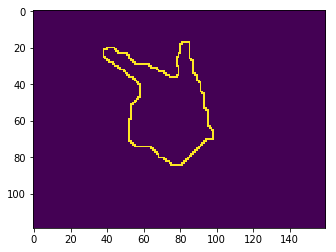

In [3]:
# EXAMPLE BOUNDARY (GUN)
good_copy_gun_1 = closing(dilation(erosion(closing('gun.bmp', se_circle7), se_diamond5), se_square5), se_circle5)
graph(boundary(good_copy_gun_1))

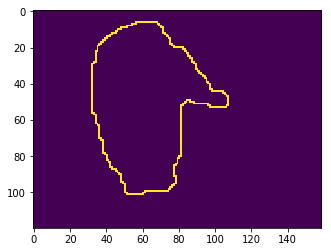

In [4]:
# EXAMPLE BOUNDARY (PALM)
good_copy_palm_1 = erosion(dilation(closing(dilation('palm.bmp', se_circle9), se_circle9), se_triangle3), se_diamond3)
graph(boundary(good_copy_palm_1))